# Unsupervised Learning: Basics 

### How does the algorthm decide what articles are similar?
* Clustering
* the algorithm scans the text and based on the frequent terms it finds similarities


# Kmeans clustering 

In [45]:
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.2, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

In [46]:
df = pd.DataFrame({'x_coordinate': x_coordinates, 'y_coordinate': y_coordinates})

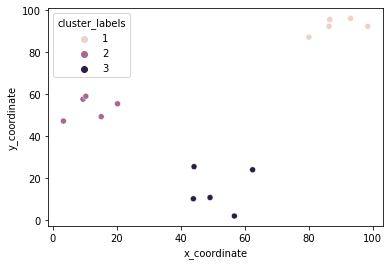

In [47]:
Z = linkage(df, 'ward')
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='cluster_labels', data=df)
plt.show()

# Basics of Hierachical Clustering 

### Which method should you use?
* how to calculate proximity between two clusters
    * how are they separated at each step
    * single: based on the two closes objects
    * complete: clusters centers are determined by the farthest objects
    * average: uses mean
    * centroid: geometric mean
    * ward: based on the sum of squares
* metric
    * the function that decides the distance between two objects
* 

scipy.cluster.hierarchy.linkage(observations,
                               method='single',
                               metric='euclidean',
                               optimal_ordering=False)

scipy.cluster.hiearchy.flcuster(distance_matrix,
                               num_clusters,
                               criterion)

* distance_matrix := output of the linkage() method
* num_clusters:= 
* criterion:= how to decide thresholds to form clusters



# How many clusters?
* Dendrograms help in showing progressions as clusters are merged
* a branching diagram that shows the progression in a linkage object as we proceed through the hierarchical clustering algorithm


from scipy.cluster.hierarchy import dendrogram
Z = linkage(df[['x_whiten', 'y_whiten']],
           method='ward',
           metric='euclidean')

dn = dendrogram(Z)
plt.show()

# Limitations of Hierarchical Clustering
* Measuring speed in hierarchical clustering
    * timeit module
    * linkage() is the largest time consumer
    * use randomly generated points
    * run various tests
    

In [48]:
from scipy.cluster.hierarchy import linkage
import pandas as pd
import random, timeit
import numpy as np

points=100
df=pd.DataFrame({'x': random.sample(range(0, points), points),
                'y':  random.sample(range(0, points), points)})

%timeit linkage(df[['x', 'y']], method='ward', metric='euclidean')

583 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [49]:
from scipy.cluster.vq import whiten

fifa = pd.read_csv('data/fifa.csv')

fifa.head()

fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])

fifa['scaled_aggression'] = whiten(fifa['aggression'])

fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,1.070924,3.609257
1,26,48,1.210610,2.749910
2,33,56,1.536544,3.208228
3,38,78,1.769353,4.468604
4,11,29,0.512181,1.661404


In [50]:
from scipy.cluster.hierarchy import linkage, fcluster
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


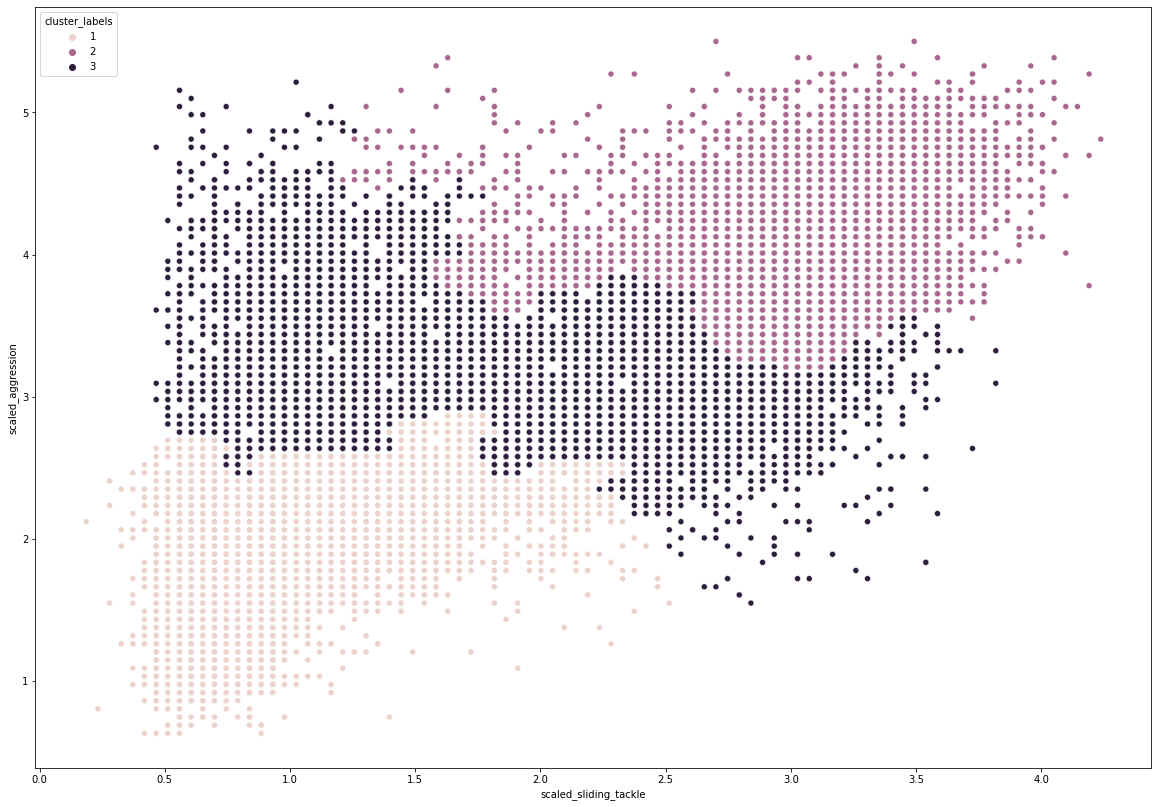

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,14))
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

# Basics of K-means clustering
* k means runs faster than hierarchical
* Parameters
* generate the centers
    * kmeans(obs, k_or_guess, iter, thresh, check_finite)
        *  obs: list of observations that have been standardized
        * k_or_guess: number of clusters
        * iter: number of iterations
        * thresh: threshold
        * check_finite: boolean, does a check need to be made on the data for inifinite or nan values
    * returns 2 arguments
        * cluster centers, distortion
            * cluster centers: known as the code book
            * distortion: sum of the squares of distances between the data points and cluster centers
* use vq to generate cluster labels
    * vq(obs, code_book, check_finite=True)
        * obs: observations standardized
        * code_book
        * check_finite
    * returns cluster labels: known as "code book index" and the distortion
    

In [56]:
#import kmeans and vq
from scipy.cluster.vq import kmeans, vq

cluster_centers, distortion = kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 5)

fifa['cluster_labels'], distortion_list = vq(fifa[['scaled_sliding_tackle', 'scaled_aggression']], cluster_centers)

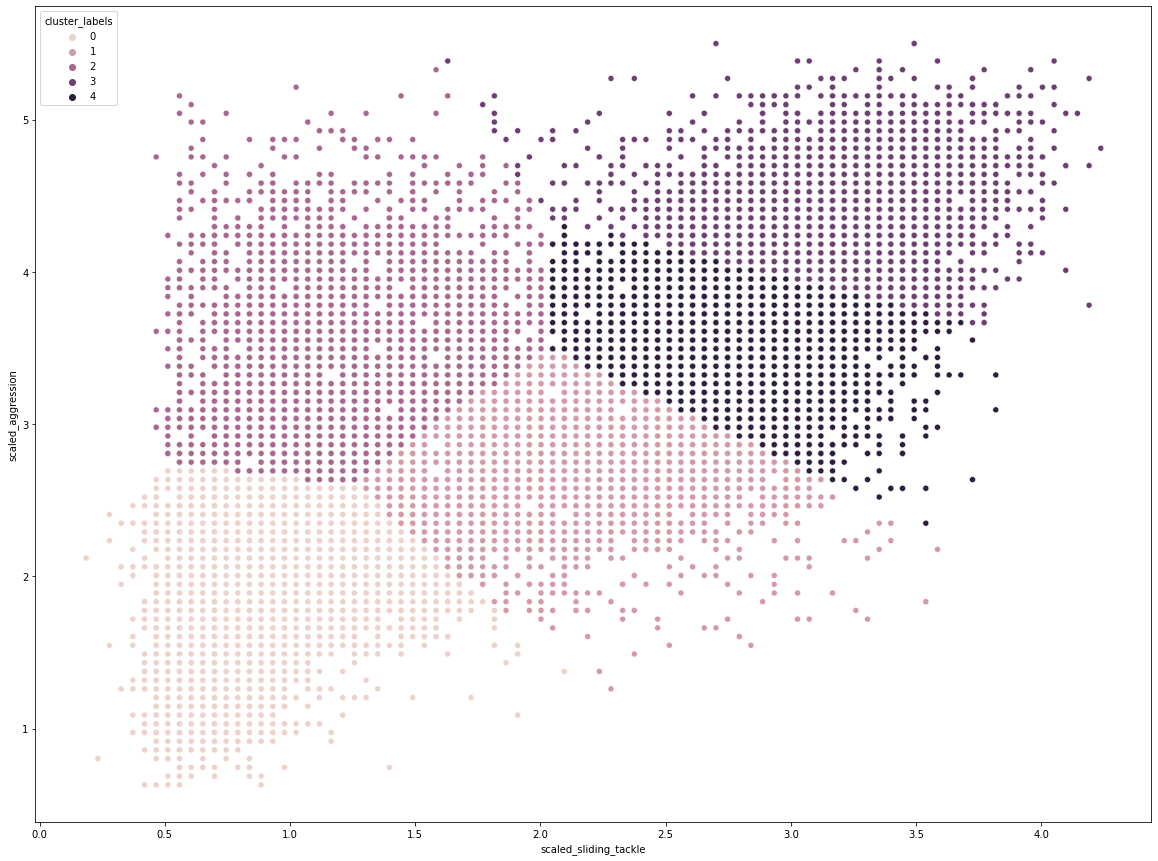

In [57]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', data=fifa, hue='cluster_labels')
plt.show()

# How many clusters?
* no absolute correct way to determine how many clusters you need.
* use an elbow plot

# Elbow method 

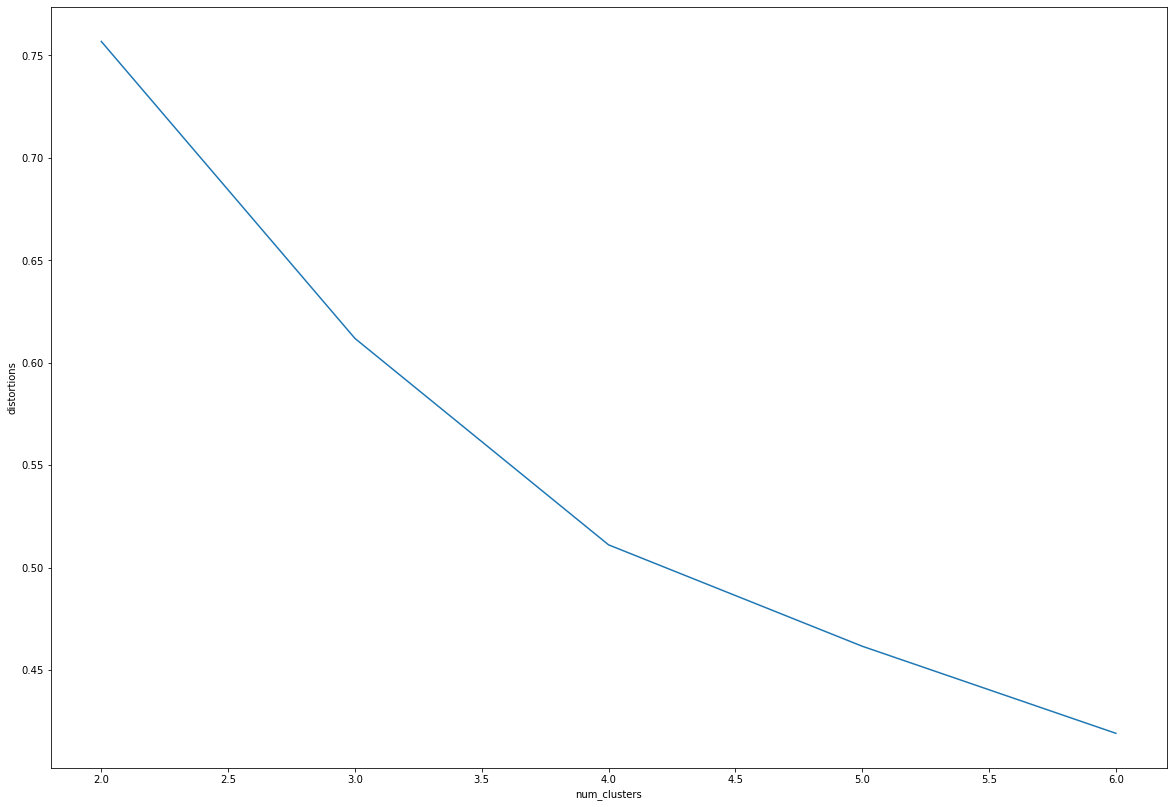

In [58]:
#declaring variables for use
distortions = []

num_clusters=range(2,7)

#collect distortions for various clusters from kmeans
for i in num_clusters:
    centroids, distortion = kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], i)
    distortions.append(distortion)

elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
                               'distortions': distortions})

plt.figure(figsize=(20,14))
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot_data)

plt.show()

# Limitations of kmeans
* not knowing how many clusters definitively
* impact of seeds on clustering
    * the procedure of defining initial cluster centers is random
    * this can affect the final clusters
    * it is good practice to initialize a randomization seed
        * random.seed(12)
        * 
* biased towards equal sized clusters

# Dominant Colors in Images 
* pictures consist of pixels
* each pixel has 3 values: RGB 0-255


# Convert image to RGB matrix

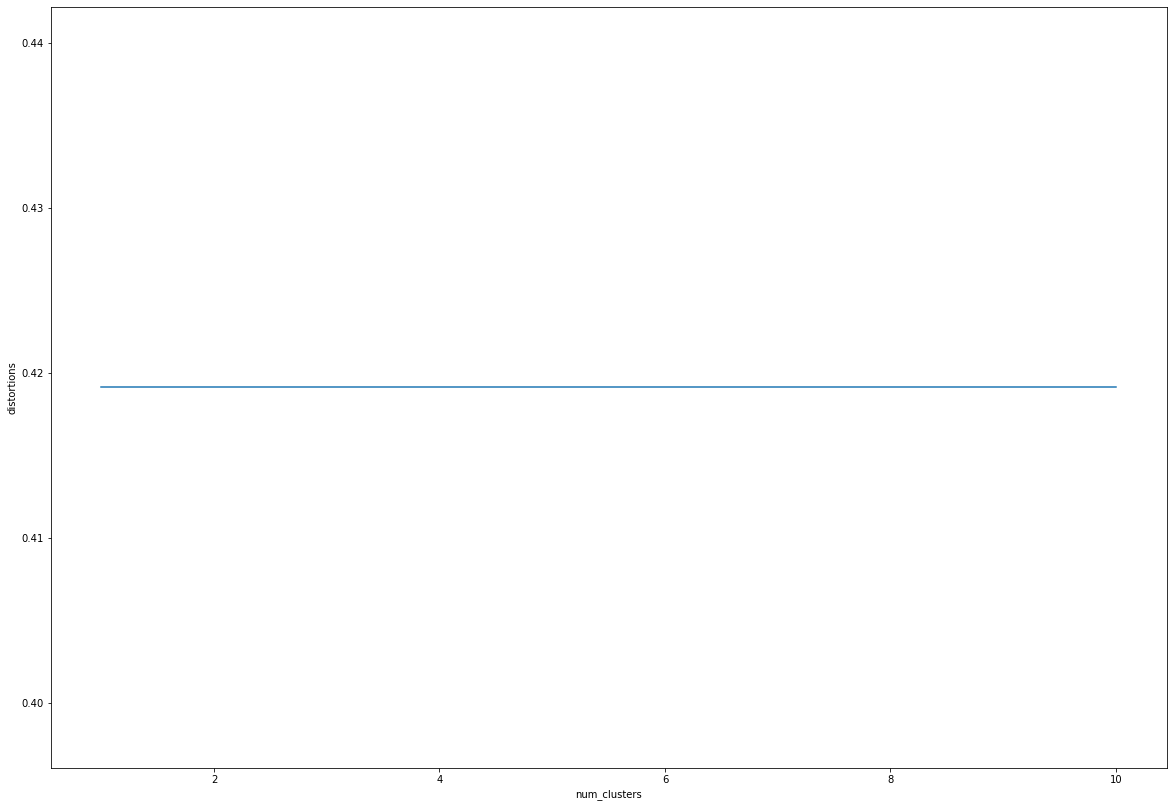

In [59]:
import matplotlib.image as img
image=img.imread('data/school.jpeg')

image.shape

r = []
g = []
b = []

for row in image:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

pixels = pd.DataFrame({'red':r, 'blue':b, 'green':g})
pixels.head()

pixels['scaled_red'] = whiten(pixels['red'])
pixels['scaled_blue'] = whiten(pixels['blue'])
pixels['scaled_green'] = whiten(pixels['green'])

pixels.head()

### How many clusters will we need? 
# * we need an elbow plot

distortions =[]
num_clusters = range(1,11)

for i in num_clusters:
    cluster_centers, _ = kmeans(pixels[['scaled_red','scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)
    
#create elbow plot dataframe
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

#create lineplot for elbowplot
plt.figure(figsize=(20,14))
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.show()

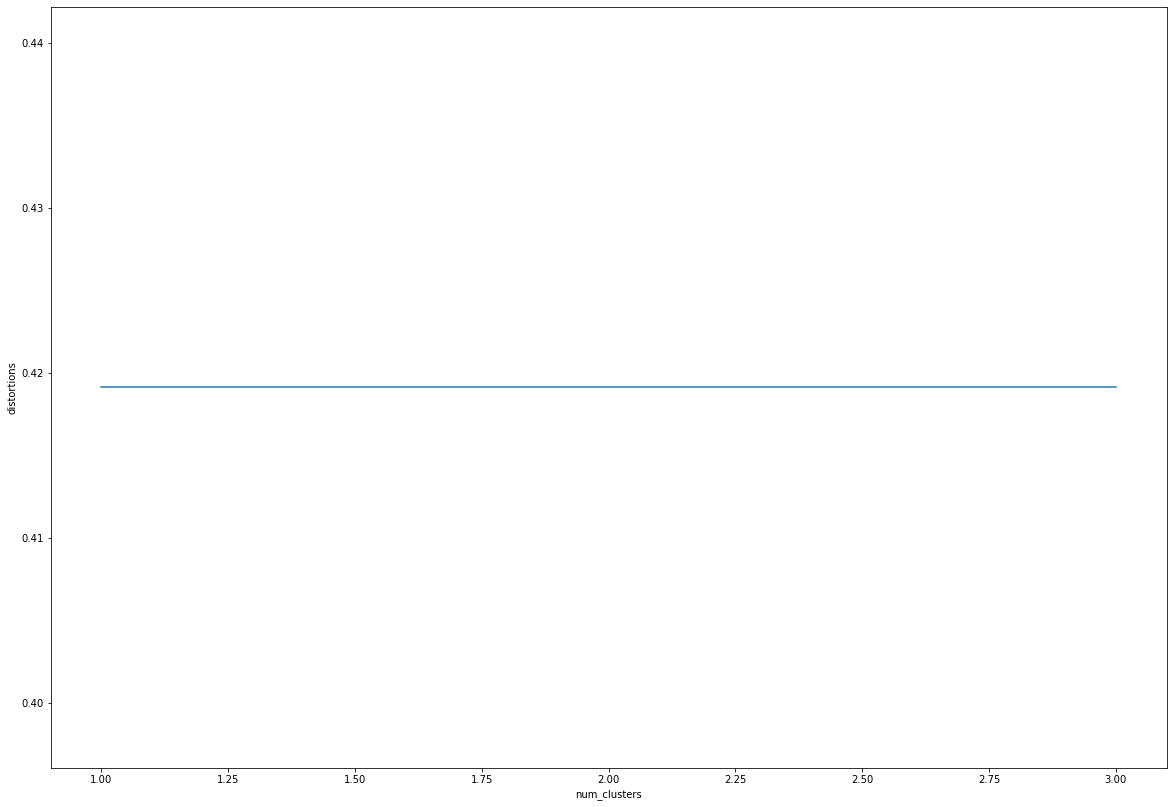

In [60]:
import matplotlib.image as img
image=img.imread('data/image.jpeg')

image.shape

r = []
g = []
b = []

for row in image:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

pixels = pd.DataFrame({'red':r, 'blue':b, 'green':g})
pixels.head()

pixels['scaled_red'] = whiten(pixels['red'])
pixels['scaled_blue'] = whiten(pixels['blue'])
pixels['scaled_green'] = whiten(pixels['green'])

pixels.head()

### How many clusters will we need? 
# * we need an elbow plot

distortions =[]
num_clusters = range(1,4)

for i in num_clusters:
    cluster_centers, _ = kmeans(pixels[['scaled_red','scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)
    
#create elbow plot dataframe
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

#create lineplot for elbowplot
plt.figure(figsize=(20,14))
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.show()

In [61]:
df = pd.read_csv('data/movies.csv')

In [62]:
df.head()

,Title,Plot
0,The Ballad of Cable Hogue,"Cable Hogue is isolated in the desert, awaitin..."
1,Monsters vs. Aliens,"In the far reaches of space, a planet explodes..."
2,The Bandit Queen,Zarra Montalvo is the daughter of an American ...
3,Broken Arrow,Major Vic Deakins (John Travolta) and Captain ...
4,Dolemite,Dolemite is a pimp and nightclub owner who is ...


In [63]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re

def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            #get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

[nltk_data] Downloading package punkt to /Users/adam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [64]:
remove_noise("It is lovely weather we are having. I hope the weather continues.")

['it',
 'is',
 'lovely',
 'weather',
 'we',
 'are',
 'having',
 'hope',
 'the',
 'weather',
 'continues']

In [98]:
stop_words_2 = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'dont',
 'should',
 'shouldve',
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 'arent',
 'couldn',
 'couldnt',
 'didn',
 'didnt',
 'doesn',
 'doesnt',
 'hadn',
 'hadnt',
 'hasn',
 'hasnt',
 'haven',
 'havent',
 'isn',
 'isnt',
 'ma',
 'mightn',
 'mightnt',
 'mustn',
 'mustnt',
 'needn',
 'neednt',
 'shan',
 'shant',
 'shouldn',
 'shouldnt',
 'wasn',
 'wasnt',
 'weren',
 'werent',
 'won',
 'wont',
 'wouldn',
 'wouldnt']

In [99]:
def remove_noise(text, stop_words = stop_words_2):

    tokens = word_tokenize(text)

    cleaned_tokens = []

    for token in tokens:

        token = re.sub('[^A-Za-z0-9]+', '', token)

        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())

    return cleaned_tokens

In [100]:
remove_noise("It is lovely weather we are having. I hope the weather continues.")

['lovely', 'weather', 'hope', 'weather', 'continues']

# TF-IDF (Term frequency-inverse document frequency)
* a weighted measure: evaluate how important a word is to a document in a collection

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [102]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=50, min_df=0.2, tokenizer=remove_noise)

In [103]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df)

### kmeans in scipy does not work on sparse matrices, as is produced above
* we must convert the sparse matri above to its condensed form
    * .todense()

In [88]:
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

ValueError: observation and code should have same number of dimensions

In [86]:
plots = df['Plot']

# TF-IDF of movie plots

Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.

Use the TfidfVectorizer class to perform the TF-IDF of movie plots stored in the list plots. The remove_noise() function is available to use as a tokenizer in the TfidfVectorizer class. The .fit_transform() method fits the data into the TfidfVectorizer objects and then generates the TF-IDF sparse matrix.

Note: It takes a few seconds to run the .fit_transform() method.

In [104]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.75, max_features=50, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

# Top terms in movie clusters

Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster. Use the .todense() method to convert the sparse matrix, tfidf_matrix to a normal matrix for the kmeans() function to process. Then, use the .get_feature_names() method to get a list of terms in the tfidf_vectorizer object. The zip() function in Python joins two lists.

The tfidf_vectorizer object and sparse matrix, tfidf_matrix, from the previous have been retained in this exercise. kmeans has been imported from SciPy.

With a higher number of data points, the clusters formed would be defined more clearly. However, this requires some computational power, making it difficult to accomplish in an exercise here. 

In [110]:
num_clusters = 3

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['film', 'life', 'one']
['father', 'family', 'mother']
['back', 'police', 'two']


In [106]:
plots

0      Cable Hogue is isolated in the desert, awaitin...
1      In the far reaches of space, a planet explodes...
2      Zarra Montalvo is the daughter of an American ...
3      Major Vic Deakins (John Travolta) and Captain ...
4      Dolemite is a pimp and nightclub owner who is ...
                             ...                        
995    Adventure-seeker Ted Osborne (Phillip Reed) an...
996    Upon finding a wagon under attack by bandits, ...
997    The plot involves a U.S. effort to root out Na...
998    In the desert outside of San Angelo, Californi...
999    Dick Tracy (Morgan Conway), a supremely intell...
Name: Plot, Length: 1000, dtype: object

# Clustering with multiple features 

In [145]:
pd.set_option('display.max_columns', None)
fifa = pd.read_csv('data/fifa_sample.csv')

fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera DivisiÃ³n,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera DivisiÃ³n,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.

In [146]:
fifa['scaled_heading_accuracy'] = whiten(fifa['heading_accuracy'])
fifa['scaled_volleys'] = whiten(fifa['volleys'])
fifa['scaled_finishing'] = whiten(fifa['finishing'])

In [147]:
fifa2 = fifa[['ID','name','scaled_heading_accuracy', 'scaled_volleys', 'scaled_finishing']]

In [148]:
fifa2.head()

,ID,name,scaled_heading_accuracy,scaled_volleys,scaled_finishing
0,20801,Cristiano Ronaldo,4.225790,4.047019,4.137214
1,158023,L. Messi,3.409445,3.909052,4.181227
2,190871,Neymar,2.977261,3.817074,3.917150
3,176580,L. SuÃ¡rez,3.697567,4.047019,4.137214
4,167495,M. Neuer,1.200509,0.505877,0.572168


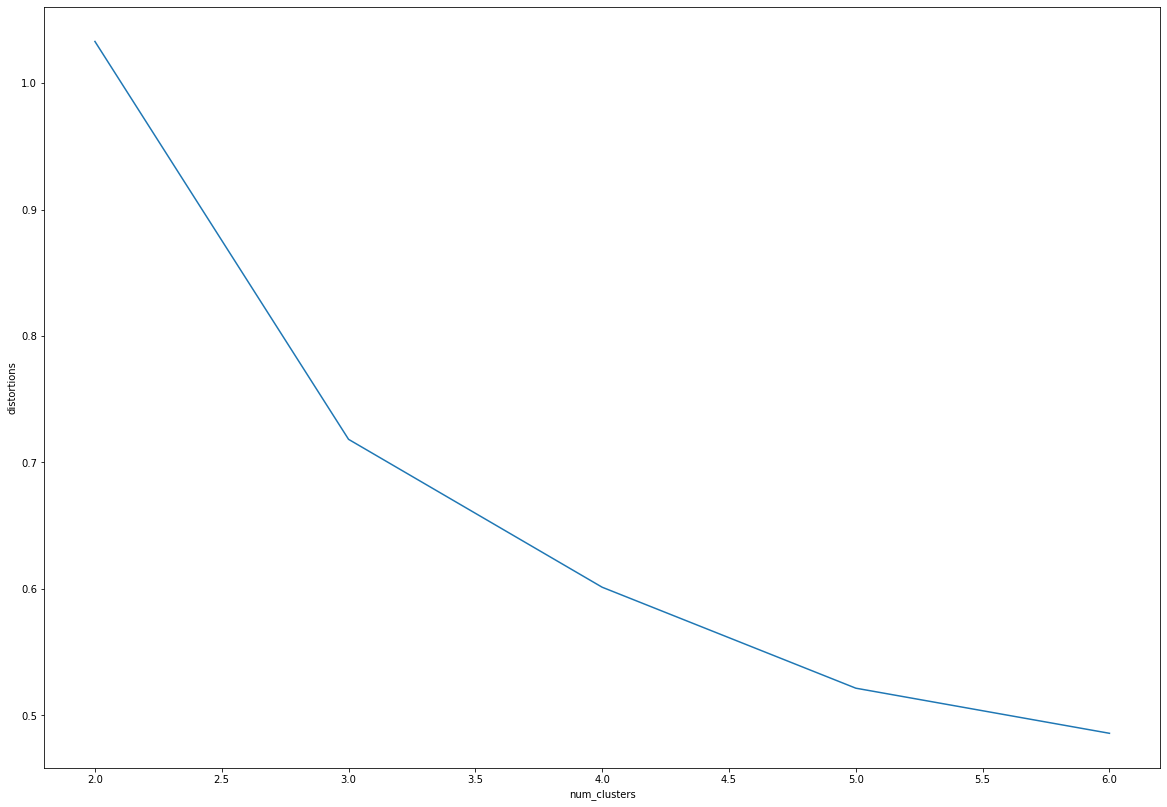

In [149]:
#declaring variables for use
distortions = []

num_clusters=range(2,7)

#collect distortions for various clusters from kmeans
for i in num_clusters:
    centroids, distortion = kmeans(fifa2[['scaled_heading_accuracy', 'scaled_volleys', 'scaled_finishing']], i)
    distortions.append(distortion)

elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
                               'distortions': distortions})

plt.figure(figsize=(20,14))
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot_data)

plt.show()

In [150]:
#import kmeans and vq
from scipy.cluster.vq import kmeans, vq

cluster_centers, distortion = kmeans(fifa2[['scaled_heading_accuracy', 'scaled_volleys', 'scaled_finishing']], 4)

fifa2['cluster_labels'], distortion_list = vq(fifa2[['scaled_heading_accuracy', 'scaled_volleys', 'scaled_finishing']], cluster_centers)

<ipython-input-150-230a11f568e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa2['cluster_labels'], distortion_list = vq(fifa2[['scaled_heading_accuracy', 'scaled_volleys', 'scaled_finishing']], cluster_centers)


In [151]:
fifa2.head()

,ID,name,scaled_heading_accuracy,scaled_volleys,scaled_finishing,cluster_labels
0,20801,Cristiano Ronaldo,4.225790,4.047019,4.137214,2
1,158023,L. Messi,3.409445,3.909052,4.181227,2
2,190871,Neymar,2.977261,3.817074,3.917150,2
3,176580,L. SuÃ¡rez,3.697567,4.047019,4.137214,2
4,167495,M. Neuer,1.200509,0.505877,0.572168,3


In [152]:
fifa2.groupby('cluster_labels')[['scaled_heading_accuracy', 'scaled_volleys', 'scaled_finishing']].mean()

,scaled_heading_accuracy,scaled_volleys,scaled_finishing
cluster_labels,,,
0,2.573834,3.077319,3.021312
1,3.642185,1.910048,1.826536
2,3.561918,3.445135,3.377269
3,0.682484,0.638146,0.581126


In [153]:
fifa2.groupby('cluster_labels')['ID'].count()

cluster_labels
0    339
1    274
2    274
3    113
Name: ID, dtype: int64

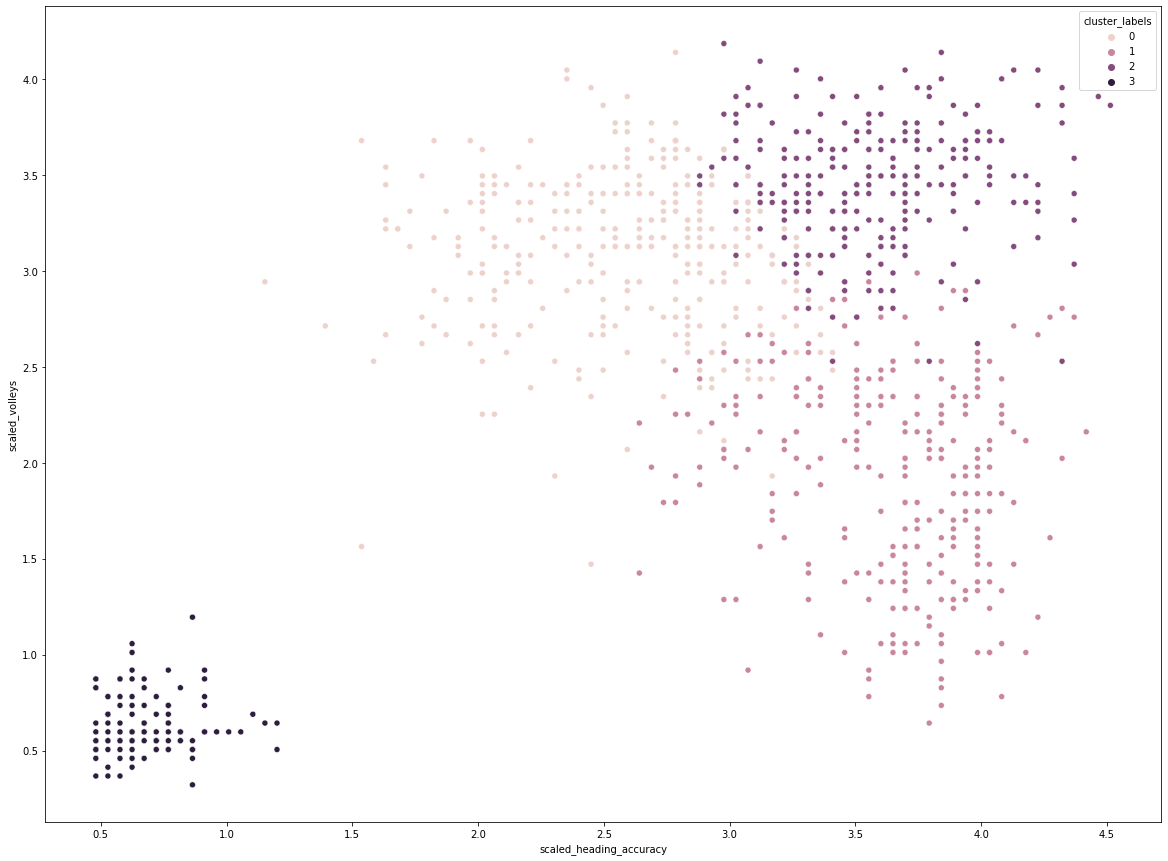

In [154]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='scaled_heading_accuracy', y='scaled_volleys', data=fifa2, hue='cluster_labels')
plt.show()

In [157]:
#get the names of the top players in each cluster
for cluster in fifa2['cluster_labels'].unique():
    print(cluster, fifa2[fifa2['cluster_labels']==cluster]['name'].values[:10])

2 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. SuÃ¡rez' 'R. Lewandowski'
 'G. HiguaÃ\xadn' 'Sergio Ramos' 'A. SÃ¡nchez' 'G. Bale' 'S. AgÃ¼ero']
3 ['M. Neuer' 'De Gea' 'T. Courtois' 'G. Buffon' 'J. Oblak' 'H. Lloris'
 'S. HandanoviÄ\x8d' 'P. ÄŒech' 'K. Navas' 'D. SubaÅ¡iÄ‡']
0 ['E. Hazard' 'T. Kroos' 'K. De Bruyne' 'L. ModriÄ‡' 'Thiago' 'M. Ã–zil'
 'A. Robben' 'N. KantÃ©' 'M. Verratti' 'C. Eriksen']
1 ['G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. GodÃ\xadn' 'M. Hummels'
 'Thiago Silva' 'Sergio Busquets' 'T. Alderweireld' 'Javi MartÃ\xadnez'
 'Sokratis']
